# Bosonic sinkhorn

Install `bfsinkhorn` if necessary

In [ ]:
%pip install git+https://github.com/DerkKooi/bfsinkhorn

Start with some imports.

In [1]:
#Toggle saving the figures
save = True

#Try to import bfsinkhorn, if it's not installed, try to import it from the cloned directory
try:
    import bfsinkhorn
except ModuleNotFoundError:
    import sys
    sys.path.append('..')
    import bfsinkhorn

#Import numpy
import numpy as np

#Import jax and set floats to 64-bit
from jax.config import config
import jax.numpy as jnp
config.update("jax_enable_x64", True)

#Import the bosonic sinkhorn
from bfsinkhorn.boson import sinkhorn

#Import for plotting and settings for the figures
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
plt.style.use(['seaborn-paper', 'seaborn-dark-palette'])
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='sans-serif')
plt.rc('lines', markersize=8)
single_column = 3 + 3/8

## Figure 2: synthetic boson distribution 1

Construct a bosonic distribution of occupation numbers, with one heavily occupied orbital and the remaining weakly occupied. The decay is linear in the index of the occupation number.

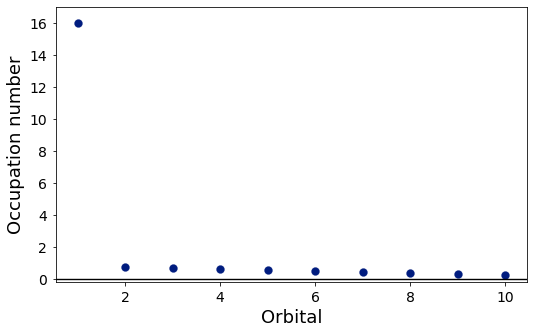

In [2]:
#Set number of orbitals norb and particles N
norb = 10
N = 20

#Set the occupation of the first and second orbital, then fill the rest decaying linearly.
n = np.empty(norb)
n[0] = 16
n[1] = 0.7
n[1:] = n[1] + np.arange(norb-1)*-2*(n[0] - N + n[1]*(norb - 1))/(norb**2 - 3*norb + 2 )

if np.any(n < 0.):
    print('some occupation smaller than zero')
    
single_column = 3 + 3/8

plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))
plt.scatter(np.arange(norb)+1, n)
plt.xlabel('Orbital')
plt.ylabel('Occupation number')
plt.ylim(-0.2, n[0]+1)
plt.axhline(y=0, color='0', linestyle='-')
plt.show()

Run both the bosonic and regular ('old') Sinkhorn.

In [3]:
print('Running bosonic sinkhorn')
result = sinkhorn(n, N)
print('Running regular sinkhorn')
result_old = sinkhorn(n, N, old=True, max_iters=50)

Running bosonic sinkhorn
iter 0, error 0.7772229951890992
iter 1, error 0.017045680371127553
iter 2, error 0.0003692767199129088
iter 3, error 8.002321421674008e-06
iter 4, error 1.7341131366976903e-07
iter 5, error 3.7577967682000946e-09
iter 6, error 8.145123464586845e-11
Running regular sinkhorn
iter 0, error 0.7772229951890992
iter 1, error 0.6530576823960345
iter 2, error 0.6408722307704522
iter 3, error 0.5622416903464651
iter 4, error 0.5587972874529882
iter 5, error 0.4972732125203771
iter 6, error 0.4937376196277666
iter 7, error 0.44300915922897155
iter 8, error 0.43815690886808645
iter 9, error 0.3955746962303358
iter 10, error 0.38952836531564405
iter 11, error 0.3534801338108328
iter 12, error 0.34660088579107273
iter 13, error 0.31592217343012496
iter 14, error 0.3085607710540519
iter 15, error 0.2823465442884683
iter 16, error 0.27478863399847375
iter 17, error 0.2523122068617243
iter 18, error 0.24477449926143352
iter 19, error 0.22544301431675184
iter 20, error 0.21808

Bosonic sinkhorn converges rapidly, while the regular ("old") Sinkhorn does not converge at all. Make a nice plot to show this. 

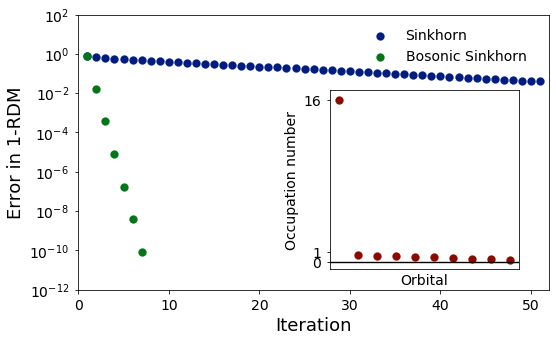

In [4]:
fig = plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))

plt.yscale('log')
plt.scatter(np.arange(len(result_old['errors']))+1, result_old['errors'], label='Sinkhorn')
plt.scatter(np.arange(len(result['errors']))+1, result['errors'], label='Bosonic Sinkhorn')
plt.legend(loc=(0.6, 0.8), framealpha=0)
plt.xlabel('Iteration')
plt.ylabel('Error in 1-RDM')
plt.ylim(10**-12, 10**2)
plt.xlim(0, 52)
ax = fig.get_axes()[0]
axins = inset_axes(ax, width="40%", height="65%", loc=7, bbox_to_anchor=(-0.05,-0.1,1,1), bbox_transform=ax.transAxes)
plt.scatter(np.arange(norb)+1, n, color='C2')
plt.xlabel('Orbital', fontsize=SMALL_SIZE)
plt.ylabel('Occupation number', fontsize=SMALL_SIZE)
plt.ylim(-0.7, n[0]+1)
plt.xticks([])
plt.yticks([0, 1, n[0]])
plt.axhline(y=0, color='0', linestyle='-')
if save:
    plt.savefig('fig2_boson_convergence.pdf',
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0.1)
plt.show()

# Supplementary figure 1: Synthetic boson distribution 2

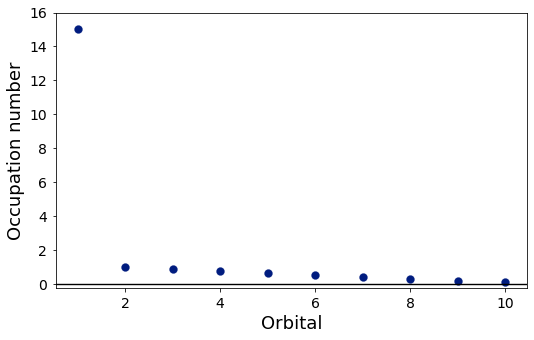

Running Bosonic Sinkhorn
iter 0, error 1.17794968565228
iter 1, error 0.03477060110459712
iter 2, error 0.0010612680813018721
iter 3, error 3.2342657962786125e-05
iter 4, error 9.857253964323798e-07
iter 5, error 3.0042375059879944e-08
iter 6, error 9.156175956315238e-10
iter 7, error 2.7897531507115048e-11
Running Sinkhorn
iter 0, error 1.17794968565228
iter 1, error 1.3565925332302124
iter 2, error 2.142619913879164
iter 3, error 2.3038240719412535
iter 4, error 4.327174073123222
iter 5, error 3.846255623245601
iter 6, error 9.358876787052724
iter 7, error 5.98420036549752
iter 8, error 17.991594536003483
iter 9, error 7.974698119430381
iter 10, error 23.190875518303365
iter 11, error 8.818221238281762
iter 12, error 24.400813316060052
iter 13, error 9.006184448830734
iter 14, error 24.610087993307193
iter 15, error 9.039935519758913
iter 16, error 24.644496541693627
iter 17, error 9.045694943727115
iter 18, error 24.65012482831557
iter 19, error 9.046664454592076
iter 20, error 24.6

NameError: name 'n1' is not defined

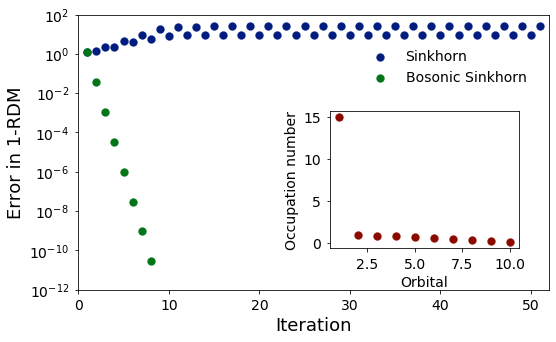

In [5]:
#Set number of orbitals norb and particles N
norb = 10
N = 20

#Set the occupation of the first and second orbital, then fill the rest decaying linearly.
n = np.empty(norb)
n[0] = 15
n[1] = 1.0
n[1:] = n[1] + np.arange(norb-1)*-2*(n[0] - N + n[1]*(norb - 1))/(norb**2 - 3*norb + 2 )

if np.any(n < 0.):
    print('some occupation smaller than zero')
    
single_column = 3 + 3/8

plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))
plt.scatter(np.arange(norb)+1, n)
plt.xlabel('Orbital')
plt.ylabel('Occupation number')
plt.ylim(-0.2, n[0]+1)
plt.axhline(y=0, color='0', linestyle='-')
plt.show()

#Run Sinkhorn
print('Running Bosonic Sinkhorn')
result = sinkhorn(n, N)
print('Running Sinkhorn')
result_old = sinkhorn(n, N, old=True, max_iters=50)

#Make the plot
fig = plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))

plt.yscale('log')
plt.scatter(np.arange(len(result_old['errors']))+1, result_old['errors'], label='Sinkhorn')
plt.scatter(np.arange(len(result['errors']))+1, result['errors'], label='Bosonic Sinkhorn')
plt.legend(loc=(0.6, 0.725), framealpha=0)
plt.xlabel('Iteration')
plt.ylabel('Error in 1-RDM')
plt.ylim(10**-12, 10**2)
plt.xlim(0, 52)
ax = fig.get_axes()[0]
axins = inset_axes(ax, width="40%", height="50%", loc=7, bbox_to_anchor=(-0.05,-0.1,1,1), bbox_transform=ax.transAxes)
plt.scatter(np.arange(norb)+1, n, color='C2')
plt.xlabel('Orbital', fontsize=SMALL_SIZE)
plt.ylabel('Occupation number', fontsize=SMALL_SIZE)
plt.ylim(-0.7, n1+1)
plt.xticks([])
plt.yticks([0, 1, n1])
plt.axhline(y=0, color='0', linestyle='-')
if save:
    plt.savefig('Sfig1_boson_convergence.pdf',
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0.1)
plt.show()

Bosonic sinkhorn converges rapidly, while the regular ("old") Sinkhorn does not converge at all.

# Supplementary figure 2: large amount of bosons

Running bosonic sinkhorn
iter 0, error 0.6890466970352443
iter 1, error 0.0003162330081372237
iter 2, error 1.4501218857998722e-07
iter 3, error 3.716353671165179e-11
Running regular sinkhorn
iter 0, error 0.6890466970352443
iter 1, error 0.2605600137825294
iter 2, error 0.09863544813526856
iter 3, error 0.03734000398778487
iter 4, error 0.014135902799192092
iter 5, error 0.0053514440270338096
iter 6, error 0.002025905734766472
iter 7, error 0.0007669503201776068
iter 8, error 0.0002903453773002502
iter 9, error 0.00010991661184566758
iter 10, error 4.161135737608299e-05
iter 11, error 1.57527491961078e-05
iter 12, error 5.963448549308829e-06
iter 13, error 2.257722156738331e-06
iter 14, error 8.546998380629622e-07
iter 15, error 3.234616400462723e-07
iter 16, error 1.224105673377766e-07
iter 17, error 4.649804723082506e-08
iter 18, error 1.7459981714628393e-08
iter 19, error 6.553002917304971e-09
iter 20, error 2.407513440850802e-09
iter 21, error 9.818389227153905e-10
iter 22, error 

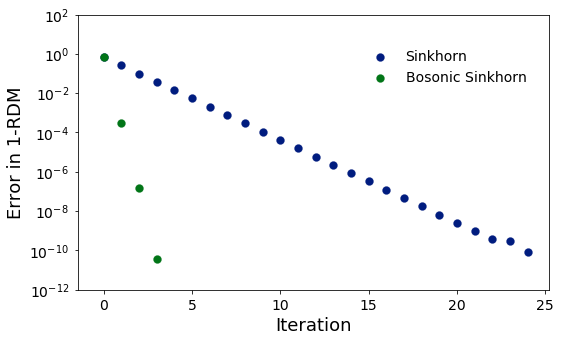

In [6]:
#Set number of orbitals norb and particles N
norb = 10000
N = 1000

#Set the occupation of the first and second orbital, then fill the rest decaying linearly.
n = np.empty(norb)
n[0] = 750
n[1:] = np.random.rand(norb-1)
n[1:] = n[1:]/(np.sum(n[1:]))*(N-n[0])
n = np.flip(np.sort(n))

print('Running bosonic sinkhorn')
config.update("jax_enable_x64", True)
result = sinkhorn(n, N)
print('Running regular sinkhorn')
config.update("jax_enable_x64", True)
result_old = sinkhorn(n, N, old=True, max_iters=50)

fig = plt.figure(figsize=(2.5*single_column, 2*single_column*3/4))

plt.yscale('log')
plt.scatter(np.arange(len(result_old['errors'])), result_old['errors'], label='Sinkhorn')
plt.scatter(np.arange(len(result['errors'])), result['errors'], label='Bosonic Sinkhorn')
plt.legend(loc=(0.6, 0.725), framealpha=0)
plt.xlabel('Iteration')
plt.ylabel('Error in 1-RDM')
plt.ylim(10**-12, 10**2)
if save:
    plt.savefig('Sfig3_large_boson_convergence.pdf',
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0.1)
plt.show()